In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image  
from IPython.display import display 

In [2]:
train=pd.read_csv('../input/hpa-single-cell-image-classification/train.csv')
train.columns

Index(['ID', 'Label'], dtype='object')

In [3]:
train.head()

,ID,Label
0,5c27f04c-bb99-11e8-b2b9-ac1f6b6435d0,8|5|0
1,5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0,14|0
2,60b57878-bb99-11e8-b2b9-ac1f6b6435d0,6|1
3,5c1a898e-bb99-11e8-b2b9-ac1f6b6435d0,16|10
4,5b931256-bb99-11e8-b2b9-ac1f6b6435d0,14|0


In [4]:
train.shape

(21806, 2)

In [5]:
sorted(train['Label'].unique(),key=len)

['0',
 '3',
 '9',
 '5',
 '6',
 '2',
 '8',
 '4',
 '7',
 '1',
 '14',
 '12',
 '13',
 '10',
 '16',
 '18',
 '17',
 '15',
 '11',
 '6|1',
 '7|2',
 '1|0',
 '9|0',
 '8|0',
 '5|0',
 '3|0',
 '2|0',
 '1|4',
 '4|0',
 '7|0',
 '7|5',
 '6|0',
 '6|3',
 '4|3',
 '8|5',
 '8|2',
 '7|3',
 '6|2',
 '1|2',
 '4|2',
 '6|7',
 '5|1',
 '9|4',
 '9|5',
 '6|5',
 '8|4',
 '9|2',
 '5|2',
 '8|3',
 '7|4',
 '9|3',
 '5|4',
 '9|8',
 '9|7',
 '6|4',
 '8|1',
 '5|3',
 '7|1',
 '1|3',
 '6|9',
 '9|9',
 '9|6',
 '9|1',
 '7|8',
 '14|0',
 '13|0',
 '12|0',
 '14|2',
 '15|0',
 '16|0',
 '2|13',
 '14|4',
 '9|13',
 '16|4',
 '4|13',
 '16|7',
 '14|1',
 '0|13',
 '16|5',
 '10|0',
 '16|9',
 '16|2',
 '12|4',
 '15|8',
 '14|3',
 '12|5',
 '5|13',
 '16|3',
 '6|13',
 '13|2',
 '16|8',
 '12|7',
 '16|1',
 '17|0',
 '17|5',
 '16|6',
 '7|10',
 '1|17',
 '9|10',
 '12|6',
 '13|3',
 '15|5',
 '3|13',
 '9|12',
 '9|16',
 '12|1',
 '12|9',
 '17|3',
 '1|13',
 '7|13',
 '12|2',
 '9|14',
 '8|13',
 '10|3',
 '15|7',
 '0|17',
 '10|4',
 '10|5',
 '13|7',
 '3|17',
 '15|4',
 '10

In [6]:
len(train['Label'].unique())

432

<AxesSubplot:xlabel='Label'>

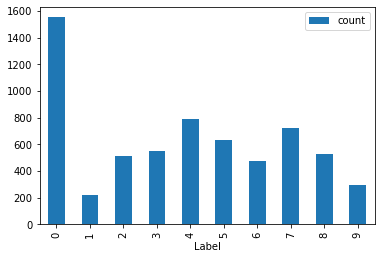

In [7]:
grp=train.groupby('Label').agg(['count'])
grp.columns=['count']
grp.sort_values(by='count', ascending=False)
grp.loc[grp.index.map(len)<2].plot(kind='bar')

<AxesSubplot:xlabel='multilabel'>

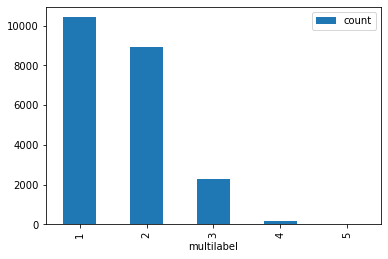

In [8]:
train['multilabel']=train['Label'].apply(lambda x: len(x.split('|')))
grp=train[['ID','multilabel']].groupby('multilabel').agg(['count'])
grp.columns=['count']
grp.plot(kind='bar')

In [9]:
LBL_NAMES = ["Nucleoplasm", "Nuclear Membrane", "Nucleoli", "Nucleoli Fibrillar Center", "Nuclear Speckles", "Nuclear Bodies", "Endoplasmic Reticulum", "Golgi Apparatus", "Intermediate Filaments", "Actin Filaments", "Microtubules", "Mitotic Spindle", "Centrosome", "Plasma Membrane", "Mitochondria", "Aggresome", "Cytosol", "Vesicles", "Negative"]
INT_2_STR = {x:LBL_NAMES[x] for x in np.arange(19)}
INT_2_STR_LOWER = {k:v.lower().replace(" ", "_") for k,v in INT_2_STR.items()}
STR_2_INT_LOWER = {v:k for k,v in INT_2_STR_LOWER.items()}
STR_2_INT = {v:k for k,v in INT_2_STR.items()}

In [ ]:
#
# Get single image that blends all RGBY into RGB
#
def get_blended_image(id): 
    # get rgby images for sample
    images = get_images(id)

    # blend rgby images into single array
    blended_array = np.stack((
            np.maximum(images[0], images[3]),
            np.maximum(images[1], images[3]),
            images[2]
        ), 2)

    # Create PIL Image
    blended_image = Image.fromarray( np.uint8(blended_array) )
    return blended_image

In [ ]:
!pip install 'git+https://github.com/haoxusci/pytorch_zoo@master#egg=pytorch_zoo'

In [ ]:
!pip install https://github.com/CellProfiling/HPA-Cell-Segmentation/archive/master.zip

In [ ]:
import hpacellseg.cellsegmentator as cellsegmentator
from hpacellseg.utils import label_cell, label_nuclei

## Cell Segmentation


In [ ]:
ROOT_PATH = '/kaggle/input/hpa-single-cell-image-classification/'

CHANNELS = np.array(['red', 'green', 'blue', 'yellow'])

CHANNEL_RED = 0    # microtubule channels
CHANNEL_GREEN = 1  # protein of interest
CHANNEL_BLUE = 2   # nuclei channels
CHANNEL_YELLOW = 3 # endoplasmic reticulum 

CHANNEL_SIZE = len(CHANNELS)
SAMPLE_SIZE = 5

In [ ]:
def get_images(id):
    images = list()
    for channel in CHANNELS:
        path = ROOT_PATH + 'train/{}_{}.png'.format(id, channel)
        image = Image.open(path) 
        images.append(image)
    return images

In [ ]:
df_train = pd.read_csv(ROOT_PATH + 'train.csv')
print("Trainning data length: {}".format(len(df_train)))
df_train.head()

In [ ]:
df_train = df_train.sample(SAMPLE_SIZE)
df_train.reset_index(inplace=True);

In [ ]:
NUC_MODEL = "./nuclei-model.pth"
CELL_MODEL = "./cell-model.pth"
segmentator = cellsegmentator.CellSegmentator(
    NUC_MODEL,
    CELL_MODEL,
    scale_factor=0.25,
    device="cuda",
    padding=False,
    multi_channel_model=True,
)

In [ ]:
sample_id = df_train['ID'].iloc[0]

images = get_images(sample_id)

nuc_segmentations = segmentator.pred_nuclei([np.asarray( images[CHANNEL_BLUE] )])
print(np.shape(nuc_segmentations))

# For full cells
cell_segmentations = cell_segmentations = segmentator.pred_cells([
        [np.asarray( images[CHANNEL_RED] )],
        [np.asarray( images[CHANNEL_YELLOW] )],
        [np.asarray( images[CHANNEL_BLUE] )]
    ])
print(np.shape(cell_segmentations))

In [ ]:
np.shape(nuc_segmentations)

In [ ]:
nuclei_mask = label_nuclei(nuc_segmentations[0])
print(np.shape(nuclei_mask))

cell_nuclei_mask, cell_mask = label_cell(nuc_segmentations[0], cell_segmentations[0])
print(np.shape(nuclei_mask))
print(np.shape(cell_mask))

In [ ]:
fig = plt.figure(figsize=(25,25))

# Nuclei mask
nuclei_image = Image.fromarray( np.uint8(nuclei_mask) )

ax = fig.add_subplot(1, 4, 1)
ax.set_title("Nuclei Mask")
plt.imshow(np.asarray(nuclei_image))

# Cell nuclei mask
cell_nuclei_image = Image.fromarray( np.uint8(cell_nuclei_mask) )

ax = fig.add_subplot(1, 4, 2)
ax.set_title("Cell Nuclei Mask")
plt.imshow(np.asarray(cell_nuclei_image))

# Cell mask
cell_image = Image.fromarray( np.uint8(cell_mask) )

ax = fig.add_subplot(1, 4, 3)
ax.set_title("Cell Mask")
plt.imshow(np.asarray(cell_image))


In [ ]:
# Get unique vector of segment numbers
numbers = set( np.ravel(cell_mask) )
numbers.remove(0)

fig = plt.figure(figsize=(25,6*len(numbers)/4))
index = 1

# plot original cell mask from above
ax = fig.add_subplot((len(numbers)//4)+1, 4, index)
ax.set_title("Complete Cell Mask")
plt.imshow(np.asarray(cell_image))
index = index + 1

for number in numbers:
    # set all other 'numbers' to zero in cell mask
    isolated = np.where(cell_mask == number, cell_mask, 0)

    # plot isolated image
    ax = fig.add_subplot((len(numbers)//4)+1, 4, index)
    ax.set_title("Segment: {}".format(number))

    plt.imshow(isolated)
    index = index + 1

In [ ]:
blended_image = get_blended_image(sample_id)
blended_array = np.asarray(blended_image)

# Get unique vector of segment numbers
numbers = np.unique(cell_mask)
numbers = np.delete(numbers, [0])

# build figure
fig = plt.figure(figsize=(25,6*len(numbers)/4))
index = 1

# plot original cell mask from above
ax = fig.add_subplot((len(numbers)//4)+1, 4, index)
ax.set_title("Blended Cell Image")
plt.imshow(np.asarray(blended_image))
index = index + 1

# plot original cell mask from above
ax = fig.add_subplot((len(numbers)//4)+1, 4, index)
ax.set_title("Complete Cell Mask")
plt.imshow(np.asarray(cell_image))
index = index + 1

for number in numbers:
    # set all other 'numbers' to 255 in cell mask
    isolated_mask = np.where(cell_mask == number, True, False)
    
    # match shape for RGB
    isolated_mask = np.stack((isolated_mask, isolated_mask, isolated_mask), axis=2)
    
    # crop across all channels
    isolated_image = np.where(isolated_mask == True, blended_array, 0)
    
    # plot isolated image
    ax = fig.add_subplot((len(numbers)//4)+2, 4, index)
    ax.set_title("Segment: {}".format(number))

    plt.imshow(isolated_image)
    index = index + 1

In [ ]:
masks = {}

sample_count = 1
for sample_index, df_sample in df_train.iterrows():
    images = get_images(df_sample['ID'])
    
    print("\rSegmentation started (count={}, current_id={})  ".format(sample_count, df_sample['ID']), end="")
    
    # Segment nuclie
    nuc_segmentations = segmentator.pred_nuclei([np.asarray( images[CHANNEL_BLUE] )])

    # For full cells
    cell_segmentations = cell_segmentations = segmentator.pred_cells([
        [np.asarray( images[CHANNEL_RED] )],
        [np.asarray( images[CHANNEL_YELLOW] )],
        [np.asarray( images[CHANNEL_BLUE] )]
    ])

    nuclei_mask, cell_mask = label_cell(nuc_segmentations[0], cell_segmentations[0])
    
    masks[df_sample['ID']] = [nuclei_mask, cell_mask]

    print("\rSegmentation completed (count={}, last_id={})   ".format(sample_count, df_sample['ID']), end="")
    sample_count = sample_count + 1


In [ ]:
# mask = np.unique(mask)
# mask = np.delete(obj_ids,[0])
# masks = mask == mask[:, None, None]
# # get bounding box coordinates for each mask
num_objs = len(masks)
boxes = []
for i,key in enumerate(masks.keys()):
    pos = np.where(masks[key])
    print(pos)
    xmin = np.min(pos[1])
    xmax = np.max(pos[1])
    ymin = np.min(pos[0])
    ymax = np.max(pos[0])
    boxes.append([xmin, ymin, xmax, ymax])
print(boxes)

In [ ]:
print(masks.keys())

In [ ]:
import cv2
fig,ax= plt.subplots(1,1, figsize=(16,8))
for box in boxes:
    cv2.rectangle((masks['b441cd36-bbba-11e8-b2ba-ac1f6b6435d0']),(box[0],box[1]),(box[2],box[3]),(22,1,255),5)
ax.set_axis_off()
ax.imshow(masks);

In [ ]:
(masks['b441cd36-bbba-11e8-b2ba-ac1f6b6435d0'])

In [ ]:
import cv2
from skimage.morphology import label
from skimage.measure import label, regionprops
for i in range(10):    
    image = '2413ad36-bba8-11e8-b2ba-ac1f6b6435d0'

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5))
#     img_0 = cv2.imread(np.asarray(get_images(sample_id)[CHANNEL_BLUE]))
    mask_0 = masks['2413ad36-bba8-11e8-b2ba-ac1f6b6435d0']
    lbl_0 = label(mask_0) 
    props = regionprops(lbl_0)
    img_1 = img_0.copy()
    print ('Image', image)
    for prop in props:
        print('Found bbox', prop.bbox)
        cv2.rectangle(img_1, (prop.bbox[1], prop.bbox[0]), (prop.bbox[3], prop.bbox[2]), (255, 0, 0), 2)


#     ax1.imshow(img_0)
    ax1.set_title('Image')
    ax2.set_title('Mask')
    ax3.set_title('Image with derived bounding box')
    ax2.imshow(mask_0[...,0], cmap='gray')
    ax3.imshow(img_1)
    plt.show()